# 2. 方差代价函数：知错

[bilibili 课程地址](https://www.bilibili.com/cheese/play/ep6588?csource=common_searchlecture_lecturecard_null)


## 课程要点

求整体函数误差值最小的数值时，最终权重的取值。最终发现，代价函数与权重的是是一个开口向上的抛物线，根据一元二次函数即可求得最优值。


误区：
- 损失函数函数与代价函数的区别？
  - 损失函数（Loss Function）：它描述了单个样本预测的准确性。换句话说，损失函数度量的是单个数据点的误差，它描述了模型的预测值与真实值之间的差异。
  - 代价函数（Cost Function）：它是整个数据集上损失函数的平均值。也就是说，代价函数度量的是模型在整个数据集上的总体性能。

## 代码实践

In [7]:
%pip install matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [8]:
import dataset
from matplotlib import pyplot as plt
import numpy as np

In [16]:
# 模拟数据集
data_size = 100
xs,ys = dataset.get_beans(data_size)
print(xs)
print(ys)

[0.0013671  0.00155315 0.00897417 0.02326726 0.02467472 0.03168266
 0.05930205 0.07688928 0.09809068 0.10006109 0.10084098 0.10376016
 0.12619211 0.13373184 0.13986736 0.14935806 0.14954004 0.15409645
 0.16564166 0.18825276 0.20527782 0.21233283 0.2225523  0.22386592
 0.24222949 0.24921788 0.25636147 0.27765946 0.28838621 0.29213039
 0.2942836  0.30014055 0.30585123 0.31770254 0.31828877 0.33484455
 0.33573144 0.33949765 0.35053577 0.35505055 0.37320781 0.38861785
 0.41580254 0.42378704 0.43845499 0.46993735 0.48455249 0.49926692
 0.50916437 0.51953579 0.52002599 0.52389521 0.52653146 0.54512162
 0.54628397 0.54811394 0.54970416 0.5666757  0.57031757 0.60532685
 0.60874713 0.61151481 0.61972778 0.6230933  0.63595026 0.64325693
 0.64849624 0.65621355 0.66067003 0.6812106  0.69109272 0.69543644
 0.70004019 0.70138807 0.70157408 0.70979775 0.77019419 0.78401593
 0.78995841 0.79176428 0.7935466  0.80202111 0.81282479 0.81894013
 0.82286579 0.85105184 0.85518623 0.86181225 0.87921677 0.8844

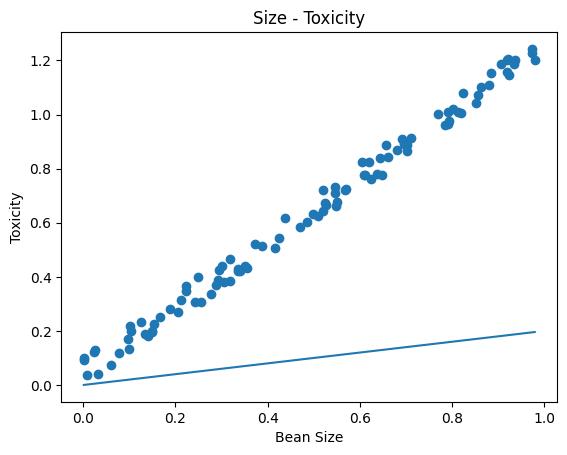

In [19]:
# 绘制豆豆大小和毒性关系的图表
plt.title("Size - Toxicity", fontsize = 12)
plt.xlabel("Bean Size")
plt.ylabel("Toxicity")

# 绘制豆豆的数据
plt.scatter(xs,ys)

# 权重，先设置一个默认值
weight = 0.2
y_pre = weight * xs

# 绘制预测的数据
plt.plot(xs,y_pre)
plt.show()


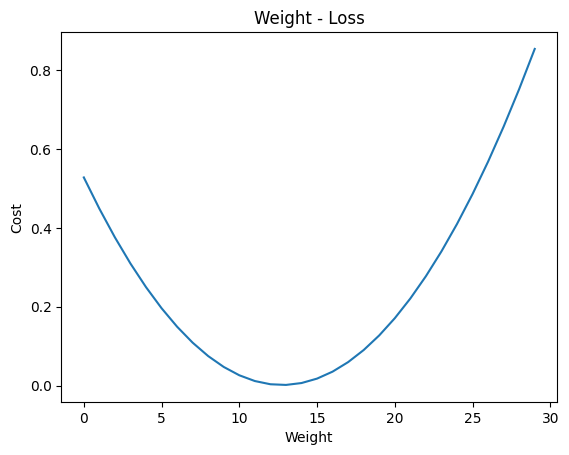

In [28]:
# 但权重取不同的数值时，整体的代价函数的变化情况

ws = np.arange(0, 3, 0.1)

es = []
for weight in ws:
    y_pre = weight*xs
    e = np.sum((ys - y_pre)**2) / data_size
    es.append(e)

# 绘制权重和损失之间的关系
plt.title("Weight - Loss", fontsize = 12)
plt.xlabel("Weight")
plt.ylabel("Cost")
plt.plot(es)


In [31]:
# 取出整体代价函数值最小的时候的权重值，即：w 取何指时 Cost 的值最小。

# 用抛物线的顶点公式计算最低点： x = -1/2 * b/a => w = -1/2 * xs**2 / xs*xy
weight_min = np.sum(xs*ys)/np.sum(xs*xs)
print(f"最小点的 w 取值：{weight_min}")

最小点的 w 取值：1.2761460011801378


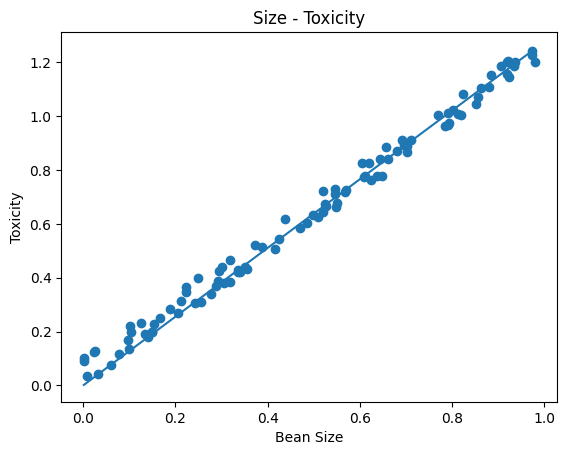

In [33]:
# 使用计算好的 weight_min 代入函数中，检查函数是否可以很好的拟合数据

plt.title("Size - Toxicity", fontsize = 12)
plt.xlabel("Bean Size")
plt.ylabel("Toxicity")

# 绘制豆豆的数据
plt.scatter(xs,ys)

# 使用计算好的最优值
weight = weight_min
y_pre = weight * xs

# 绘制预测的数据
plt.plot(xs,y_pre)
plt.show()